# Data preprocessing and split

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.13.0


In [2]:
data = pd.read_csv('/Users/ujong-yun/Documents/학부연구생/학부연구생 - dataset 공유 (csv).csv')
data.dropna()
regression_data = data.loc[data['Knocking'] == 0]
regression_data

,Case,Engine Speed,Spark Timing,Throttle Angle,Ambient Temperature,Intake Pressure,Intake Temperature,Exhaust Pressure,Exhaust Temperature,Injected Mass,Maximum Pressure,Crank Angle at Maximum Pressure,Maximum Rate of Pressure Rise,BMEP,IMEP,BSFC,BSNOx,BSCO,Knocking Index,Knocking
547,546.0,2000,-10,30,283,0.975,288.8,1.069,858.7,36.89,39.8,27.96,1.33,8.67,10.1,307.4,2.91,222.7,0.0,0.0
548,547.0,2000,-10,30,293,0.974,295.5,1.068,858.6,36.61,39.5,27.48,1.32,8.6,9.98,307.2,2.99,220.9,0.0,0.0
549,548.0,2000,-10,30,303,0.974,302.3,1.067,858.1,36.35,39.2,27.62,1.31,8.53,9.86,307.5,3.03,221.4,0.0,0.0
550,549.0,2000,-10,35,283,0.982,288.8,1.07,861.2,37.35,40.9,27.25,1.39,8.82,10.31,304.4,3.23,215.2,0.0,0.0
551,550.0,2000,-10,35,293,0.982,295.6,1.069,858.9,37.1,40.6,27.41,1.39,8.75,10.19,306.1,3.09,221.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,2140.0,6000,-10,85,293,0.969,294.1,1.493,1088.4,48.07,33.1,36.97,0.78,8.13,10.29,426,1.73,403,0.0,0.0
2142,2141.0,6000,-10,85,303,0.969,301.6,1.488,1089.5,47.74,33.3,36.99,0.78,8.08,10.27,425.9,1.81,402.8,0.0,0.0
2143,2142.0,6000,-10,90,283,0.97,286.6,1.498,1088.9,48.4,32.9,37.96,0.78,8.2,10.31,424.8,1.72,399.2,0.0,0.0
2144,2143.0,6000,-10,90,293,0.969,294.1,1.493,1088.5,48.08,33.1,36.97,0.78,8.14,10.29,425.9,1.74,402.7,0.0,0.0


In [3]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Case                             1064 non-null   float64
 1   Engine Speed                     1064 non-null   object 
 2   Spark Timing                     1064 non-null   object 
 3   Throttle Angle                   1064 non-null   object 
 4   Ambient Temperature              1064 non-null   object 
 5   Intake Pressure                  1064 non-null   object 
 6   Intake Temperature               1064 non-null   object 
 7   Exhaust Pressure                 1064 non-null   object 
 8   Exhaust Temperature              1064 non-null   object 
 9   Injected Mass                    1064 non-null   object 
 10  Maximum Pressure                 1064 non-null   object 
 11  Crank Angle at Maximum Pressure  1064 non-null   object 
 12  Maximum Rate of Pressur

In [4]:
input_data = regression_data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9]]
input_data
input_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Engine Speed         1064 non-null   object
 1   Spark Timing         1064 non-null   object
 2   Throttle Angle       1064 non-null   object
 3   Ambient Temperature  1064 non-null   object
 4   Intake Pressure      1064 non-null   object
 5   Intake Temperature   1064 non-null   object
 6   Exhaust Pressure     1064 non-null   object
 7   Exhaust Temperature  1064 non-null   object
 8   Injected Mass        1064 non-null   object
dtypes: object(9)
memory usage: 83.1+ KB


In [5]:
output_data = regression_data.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17]]
output_data
output_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Maximum Pressure                 1064 non-null   object
 1   Crank Angle at Maximum Pressure  1064 non-null   object
 2   Maximum Rate of Pressure Rise    1064 non-null   object
 3   BMEP                             1064 non-null   object
 4   IMEP                             1064 non-null   object
 5   BSFC                             1064 non-null   object
 6   BSNOx                            1064 non-null   object
 7   BSCO                             1064 non-null   object
dtypes: object(8)
memory usage: 74.8+ KB


In [6]:
input_data=input_data.astype('float')
output_data = output_data.astype('float')
input_data.info()
output_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Engine Speed         1064 non-null   float64
 1   Spark Timing         1064 non-null   float64
 2   Throttle Angle       1064 non-null   float64
 3   Ambient Temperature  1064 non-null   float64
 4   Intake Pressure      1064 non-null   float64
 5   Intake Temperature   1064 non-null   float64
 6   Exhaust Pressure     1064 non-null   float64
 7   Exhaust Temperature  1064 non-null   float64
 8   Injected Mass        1064 non-null   float64
dtypes: float64(9)
memory usage: 83.1 KB
<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Maximum Pressure                 1064 non-null   float64
 1   Crank Angle 

In [7]:
train_input, test_input, train_output, test_output = train_test_split(input_data, output_data, test_size=0.2, shuffle = True, random_state=42)
train_input, val_input, train_output, val_output = train_test_split(train_input, train_output, test_size = 0.25, shuffle=True, random_state=42)
print(train_input.shape, train_output.shape)
print(val_input.shape, val_output.shape)
print(test_input.shape, test_output.shape)


(638, 9) (638, 8)
(213, 9) (213, 8)
(213, 9) (213, 8)


In [8]:
print(test_output.index)

Index([ 578, 2135, 1282, 1743, 1854, 1499, 1510, 1522,  746, 1280,
       ...
       1465, 1993, 2019, 1216,  766, 1512,  715,  780, 2087,  572],
      dtype='int64', length=213)


In [9]:
ss = StandardScaler()
ss.fit(train_input)
train_scale = ss.transform(train_input)
val_scale =  ss.transform(val_input)
test_scale =  ss.transform(test_input)

# DNN Model

In [10]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, activation='elu', input_shape = (9, )))
model.add(keras.layers.Dense(128, activation='elu'))
model.add(keras.layers.Dense(64, activation='elu'))
model.add(keras.layers.Dense(32, activation= 'elu'))
model.add(keras.layers.Dense(16, activation= 'elu'))
model.add(keras.layers.Dense(8))
model.summary()

2024-03-15 15:16:20.600519: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-03-15 15:16:20.600547: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-15 15:16:20.600554: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-15 15:16:20.600637: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-15 15:16:20.600687: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
Total params: 46456 (181.47 KB)
Trainable params: 46456 

In [11]:
#initial_learning_rate = 0.01
#lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    #initial_learning_rate,
    #decay_steps=100000,
    #decay_rate=0.96,
    #staircase=True)

In [12]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-multiregression-model.h5')
callback = keras.callbacks.EarlyStopping(monitor = 'loss', patience=20, verbose=True)
model.compile(tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss = 'mse', metrics=['mae', 'mse'])
history = model.fit(train_scale, train_output, batch_size=32, validation_data=(val_scale, val_output) ,epochs=1000, callbacks=[callback])

Epoch 1/1000


2024-03-15 15:16:24.659712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 2s 43ms/step - loss: 25129.5977 - mae: 89.8296 - mse: 25129.5977 - val_loss: 24409.6523 - val_mae: 89.0030 - val_mse: 24409.6523
Epoch 2/1000


2024-03-15 15:16:25.694526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 0s 23ms/step - loss: 23584.1621 - mae: 87.3015 - mse: 23584.1621 - val_loss: 21090.9375 - val_mae: 83.8931 - val_mse: 21090.9375
Epoch 3/1000
20/20 [==============================] - 0s 24ms/step - loss: 15708.4229 - mae: 77.9674 - mse: 15708.4229 - val_loss: 8945.7305 - val_mae: 66.5294 - val_mse: 8945.7305
Epoch 4/1000
20/20 [==============================] - 0s 23ms/step - loss: 6312.2207 - mae: 55.8588 - mse: 6312.2207 - val_loss: 4335.6880 - val_mae: 40.9008 - val_mse: 4335.6880
Epoch 5/1000
20/20 [==============================] - 0s 23ms/step - loss: 3353.8279 - mae: 35.2833 - mse: 3353.8279 - val_loss: 2660.1091 - val_mae: 29.0780 - val_mse: 2660.1091
Epoch 6/1000
20/20 [==============================] - 0s 23ms/step - loss: 2362.2412 - mae: 28.0695 - mse: 2362.2412 - val_loss: 1903.4734 - val_mae: 24.3214 - val_mse: 1903.4734
Epoch 7/1000
20/20 [==============================] - 0s 23ms/step - loss: 1717.8767 - mae: 23.9899 - mse: 1717.

In [17]:
model.save('best-multiregression-model.h5')
model = keras.models.load_model('best-multiregression-model.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
hist = history.history
hist['epochs'] = history.epoch
epochs = hist['epochs']
loss = hist['loss']
val_loss = hist['val_loss']
mae = hist['mae']
val_mae = hist['val_mae']
mse = hist['mse']
val_mse = hist['mse']
def plot_history(history):

    fig, axes = plt.subplots(1, 3, constrained_layout = True, figsize = (10, 5))
    axes[0].plot(epochs, loss, label = 'Training_loss')
    axes[0].plot(epochs, val_loss, label = 'val_loss')
    axes[1].plot(epochs, mae, label = 'Training_mae')
    axes[1].plot(epochs, val_mae, label = 'val_mae')
    axes[2].plot(epochs, mse, label = 'Training_mse')
    axes[2].plot(epochs, val_mse, label = 'val_mse')
    axes[0].set_title('Training and validation loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[1].set_title('Training and validation mae')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('MAE')
    axes[2].set_title('Training and validation mse')
    axes[2].set_xlabel('Epochs')
    axes[2].set_ylabel('MSE')
    axes[0].legend()
    axes[1].legend()
    axes[2].legend()
    plt.show()
    


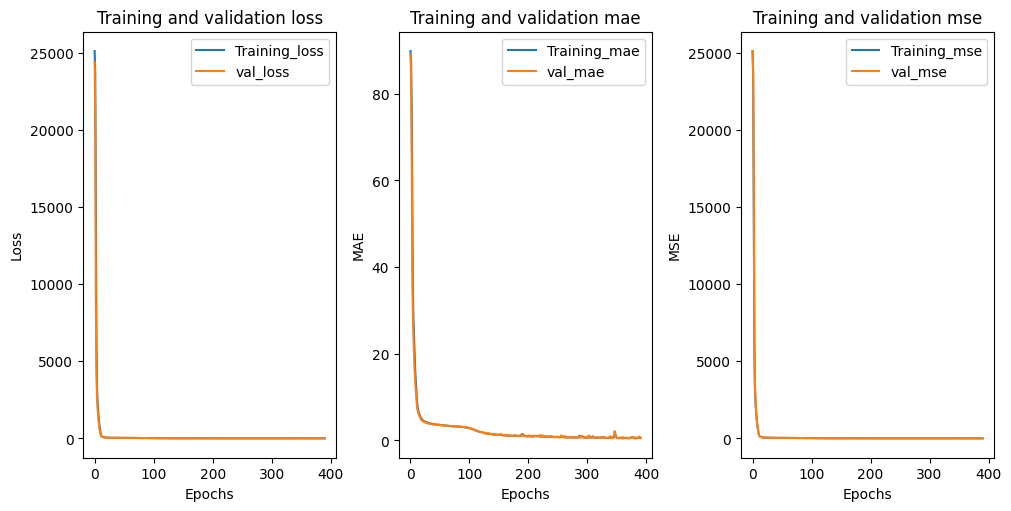

In [19]:
plot_history(history)

In [20]:
loss_mae_mse_df = pd.DataFrame(((loss[i], val_loss[i], mae[i], val_mae[i],  mse[i], val_mse[i]) for i in range(len(history.epoch))), columns=['Loss', 'Val_Loss', 'MAE', 'Val_MAE', 'MSE', 'Val_MSE'])
loss_mae_mse_df

,Loss,Val_Loss,MAE,Val_MAE,MSE,Val_MSE
0,25129.597656,24409.652344,89.829567,89.002968,25129.597656,25129.597656
1,23584.162109,21090.937500,87.301468,83.893112,23584.162109,23584.162109
2,15708.422852,8945.730469,77.967361,66.529449,15708.422852,15708.422852
3,6312.220703,4335.687988,55.858757,40.900772,6312.220703,6312.220703
4,3353.827881,2660.109131,35.283279,29.078022,3353.827881,3353.827881
...,...,...,...,...,...,...
386,0.800644,0.999551,0.552882,0.610532,0.800644,0.800644
387,1.065779,1.231546,0.621369,0.652027,1.065779,1.065779
388,2.317332,2.856134,0.812256,0.934269,2.317332,2.317332
389,1.231261,1.021458,0.648750,0.588881,1.231261,1.231261


In [21]:
loss_mae_mse_df.to_csv('Loss_Mae_Mse_df.csv', index = True)

In [22]:
model.evaluate(test_scale, test_output)
model.evaluate(train_scale, train_output)
model.evaluate(val_scale, val_output)

7/7 [==============================] - 0s 16ms/step - loss: 0.9083 - mae: 0.5814 - mse: 0.9083


2024-03-15 15:30:15.329972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 11ms/step - loss: 0.9289 - mae: 0.5775 - mse: 0.9289


[0.9288926720619202, 0.5774769186973572, 0.9288926720619202]

In [23]:
predicted_test = model.predict(test_scale)
predicted_train = model.predict(train_scale)
predicted_val = model.predict(val_scale)

 9/20 [============>.................] - ETA: 0s

2024-03-15 15:30:16.099972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 6ms/step


In [24]:
predicted_test_df = pd.DataFrame(predicted_test)
predicted_train_df = pd.DataFrame(predicted_train)
predicted_val_df = pd.DataFrame(predicted_val)

In [25]:
predicted_test_df.columns = ['Maximum Pressure(predicted)', 'Crank Angle at Maximum Pressure(predicted)', 'Maximum Rate of Pressure Rise(predicted)', 'BMEP(predicted)',
                         'IMEP(predicted)', 'BSFC(predicted)', 'BSNOx(predicted)', 'BSCO(predicted)']
predicted_train_df.columns = ['Maximum Pressure(predicted)', 'Crank Angle at Maximum Pressure(predicted)', 'Maximum Rate of Pressure Rise(predicted)', 'BMEP(predicted)',
                         'IMEP(predicted)', 'BSFC(predicted)', 'BSNOx(predicted)', 'BSCO(predicted)']
predicted_val_df.columns = ['Maximum Pressure(predicted)', 'Crank Angle at Maximum Pressure(predicted)', 'Maximum Rate of Pressure Rise(predicted)', 'BMEP(predicted)',
                         'IMEP(predicted)', 'BSFC(predicted)', 'BSNOx(predicted)', 'BSCO(predicted)']

In [26]:
predicted_test_df.index = test_output.index
predicted_train_df.index = train_output.index
predicted_val_df.index = val_output.index

In [27]:
def DataFrame(predicted_df, df_outuput, output_df):
   for i in range(8):
      predicted_df.insert(2*i+1, df_outuput.columns[i], output_df.iloc[:, [i]])
   predicted_df

In [64]:
predicted_test_df

,Maximum Pressure(predicted),Maximum Pressure,Crank Angle at Maximum Pressure(predicted),Crank Angle at Maximum Pressure,Maximum Rate of Pressure Rise(predicted),Maximum Rate of Pressure Rise,BMEP(predicted),BMEP,IMEP(predicted),IMEP,BSFC(predicted),BSFC,BSNOx(predicted),BSNOx,BSCO(predicted),BSCO
578,41.720318,42.8,27.448090,26.73,1.248747,1.53,9.471144,8.97,10.354410,10.59,306.307892,304.0,3.495212,3.49,220.261581,220.0
2135,31.843363,32.8,37.733757,36.98,1.093717,0.77,7.971080,8.07,10.070024,10.21,428.667786,427.2,1.412363,1.72,404.041443,403.8
1282,65.594864,65.9,17.999329,18.78,3.320805,3.01,11.382939,11.48,13.257752,13.56,294.423462,296.5,4.946413,5.05,240.670731,241.8
1743,39.205814,38.9,34.002457,33.83,0.859579,1.00,9.165236,9.19,11.346533,11.60,377.251678,375.6,2.153072,2.35,342.220825,341.5
1854,59.443573,59.7,20.196878,20.87,2.441705,2.42,9.908331,10.20,12.360216,12.58,335.509888,336.8,3.923213,3.88,317.358002,317.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,51.500202,51.7,25.616142,25.85,2.017801,1.83,10.108431,10.52,12.185418,12.72,322.430969,323.3,3.088829,3.59,281.095215,280.7
715,49.215950,48.7,22.145269,22.73,2.136455,1.95,10.036057,9.86,10.997758,10.97,293.801636,291.3,4.143559,4.47,214.044342,209.8
780,41.165257,38.4,28.739738,29.57,1.081071,1.19,9.851686,9.32,10.924137,10.35,310.094482,307.5,3.621521,3.47,226.813400,226.5
2087,42.151455,42.6,29.175243,29.00,1.456373,1.30,8.507978,8.92,10.810328,11.10,379.531708,378.2,2.665664,2.53,360.229553,360.8


In [29]:
DataFrame(predicted_train_df, train_output, train_output)

In [30]:
DataFrame(predicted_val_df, val_output, val_output)

In [31]:
predicted_test_df.to_csv("Predicted_result.csv")

In [32]:
predicted_train_df.to_csv("Predicted_train_result.csv")

In [33]:
predicted_val_df.to_csv("Predicted_val_result.csv")

In [34]:
#R2_score
def R2_score(predicted_true):
    list = []
    metrics = tf.keras.metrics.R2Score()
    for i in range(8):
        metrics.update_state(predicted_true.iloc[:, [2*i+1]], predicted_true.iloc[:, [2*i]])
        result = metrics.result()
        list.append(result.numpy())

    return list

In [35]:
print(R2_score(predicted_test_df))
print(R2_score(predicted_train_df))
print(R2_score(predicted_val_df))

[0.9896805, 0.9965965, 0.9987992, 0.9988849, 0.99886316, 0.9999456, 0.9999464, 0.9999442]
[0.9933753, 0.9974109, 0.9990532, 0.99911237, 0.9990975, 0.9999583, 0.9999592, 0.9999577]
[0.9930933, 0.9977038, 0.999098, 0.9991415, 0.9991182, 0.9999478, 0.99994916, 0.99994516]


In [36]:
R2_score_df = pd.DataFrame((R2_score(predicted_test_df), R2_score(predicted_train_df), R2_score(predicted_val_df)), columns = ['Maximum Pressure', 'Crank Angle at Maximum Pressure', 'Maximum Rate of Pressure Rise', 'BMEP','IMEP', 'BSFC', 'BSNOx', 'BSCO'], index = ['Test', 'Train', 'Validation'])
R2_score_df

,Maximum Pressure,Crank Angle at Maximum Pressure,Maximum Rate of Pressure Rise,BMEP,IMEP,BSFC,BSNOx,BSCO
Test,0.989681,0.996597,0.998799,0.998885,0.998863,0.999946,0.999946,0.999944
Train,0.993375,0.997411,0.999053,0.999112,0.999098,0.999958,0.999959,0.999958
Validation,0.993093,0.997704,0.999098,0.999142,0.999118,0.999948,0.999949,0.999945


In [66]:
# RMSE와 R2 score 같이 저장

In [37]:
R2_score_df.to_csv('R2_score.csv')

In [62]:
print(predicted_test_df.iloc[:, 2])
print(test_output.iloc[:, 2])


578     27.448090
2135    37.733757
1282    17.999329
1743    34.002457
1854    20.196878
          ...    
1512    25.616142
715     22.145269
780     28.739738
2087    29.175243
572     27.365597
Name: Crank Angle at Maximum Pressure(predicted), Length: 213, dtype: float32
578     1.53
2135    0.77
1282    3.01
1743    1.00
1854    2.42
        ... 
1512    1.83
715     1.95
780     1.19
2087    1.30
572     1.53
Name: Maximum Rate of Pressure Rise, Length: 213, dtype: float64


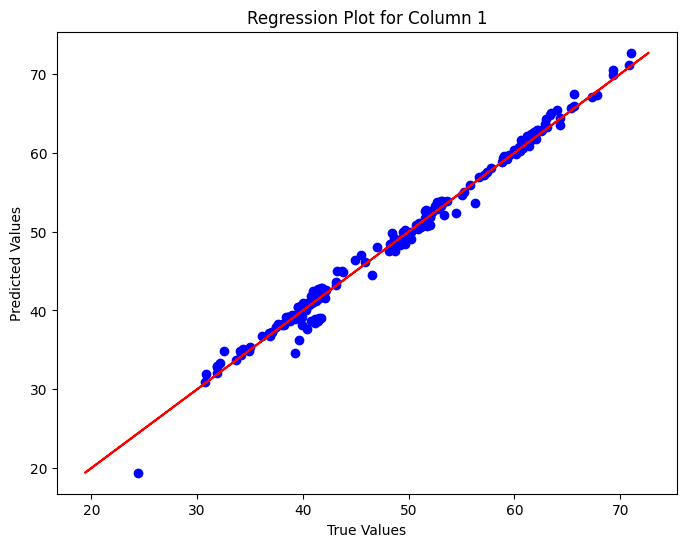

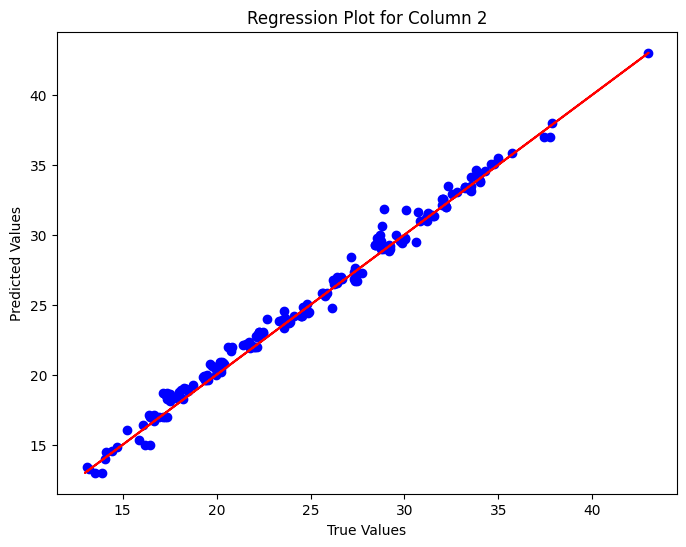

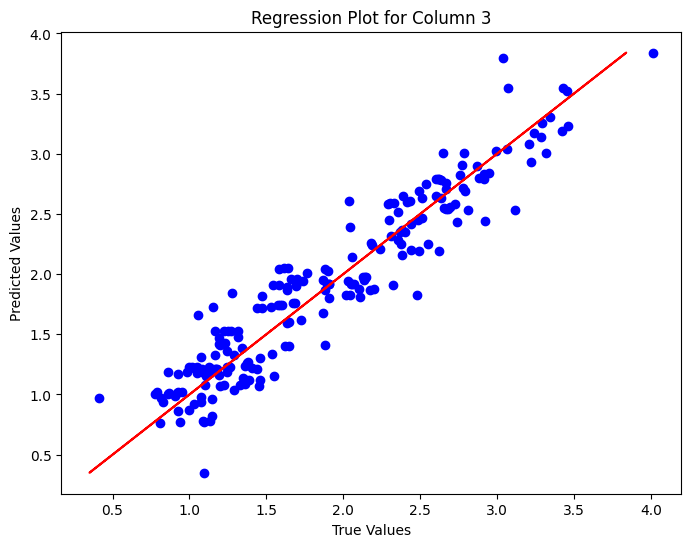

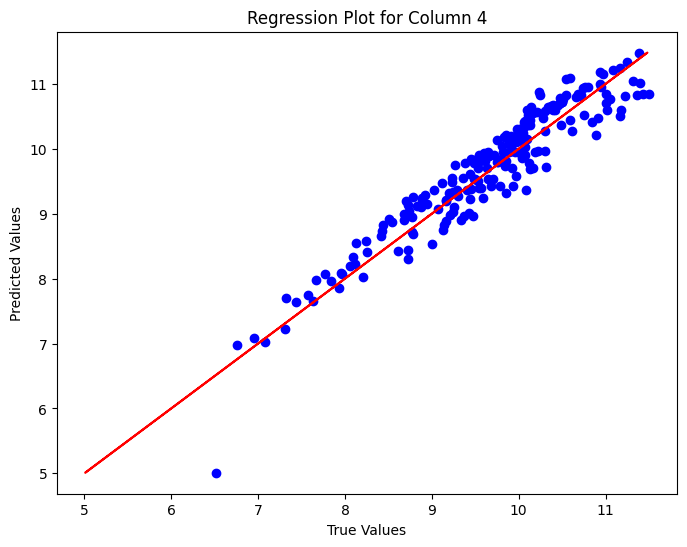

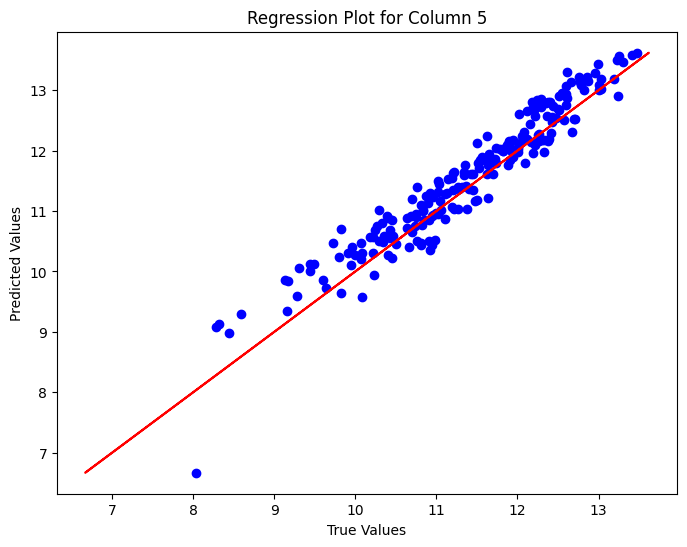

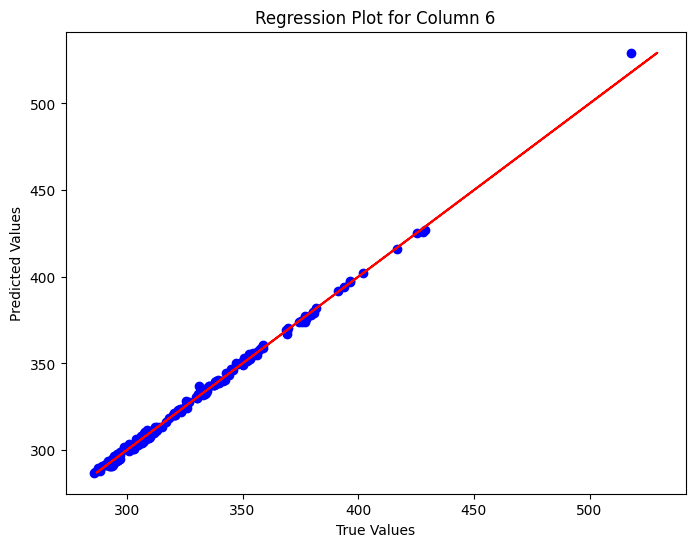

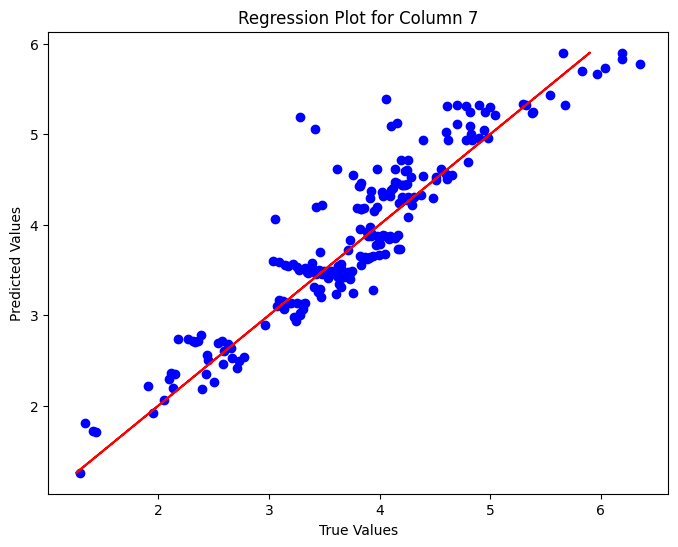

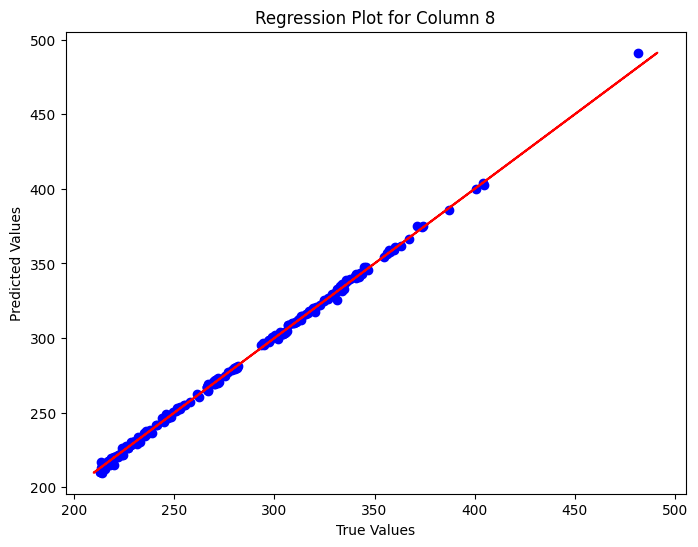

In [65]:
import matplotlib.pyplot as plt

# 각 컬럼별로 산점도 그리기
for i in range(predicted_test.shape[1]):
    plt.figure(figsize=(8, 6))
    plt.scatter(predicted_test_df.iloc[:, 2*i], predicted_test_df.iloc[:, 2*i+1], color='blue')
    plt.plot(test_output.iloc[:, i], test_output.iloc[:, i], color='red')  # y=x 직선 그리기 (참 값과 예측 값이 일치하는 경우)
    plt.title(f'Regression Plot for Column {i+1}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.show()


In [36]:
from sklearn.model_selection import ParameterGrid

# 하이퍼파라미터 그리드 정의
param_grid = {
    'dropout_rate': [0.1 ,0.2, 0.3,],
    'learning_rate': [0.001, 0.01, 0.1],
    'hidden_layers': [1, 2, 3],
    'hidden_units': [128, 64, 32],
    'batch_size' : [32, 16, 8]
}


# 하이퍼파라미터 그리드를 순회하며 그리드 서치 실행

best_mse = float('inf')
best_params = {}
new_df = pd.DataFrame()

for params in ParameterGrid(param_grid):
    print("Training with parameters:", params)
    
    # 모델 생성
    model = keras.Sequential()
    model.add(keras.layers.Dense(params['hidden_units'], activation='relu', input_shape=(9, )))
    model.add(keras.layers.Dropout(rate=params['dropout_rate']))
    
    for _ in range(params['hidden_layers']):
        model.add(keras.layers.Dense(params['hidden_units'], activation='relu'))
        model.add(keras.layers.Dropout(rate=params['dropout_rate']))
    
    model.add(keras.layers.Dense(8))
    
    # 모델 컴파일
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse'])
    
    # 모델 훈련
    history = model.fit(train_scale, train_output, batch_size = params['batch_size'], validation_data=(val_scale, val_output), epochs=1000, callbacks=[callback, checkpoint_cb], verbose=0)
    
    # 검증 세트에 대한 평가
    metrics = model.evaluate(val_scale, val_output, verbose=0)
    print("Validation MAE :", metrics[0])
    print("Validation MSE :", metrics[1])
    
    #데이터 저장
    data_params = [params['learning_rate'], params['dropout_rate'], params['hidden_layers'], params['hidden_units'], params['batch_size'], metrics[0], metrics[1]]
    params_df = pd.DataFrame({"Learning_Rate" : [params['learning_rate']], 'Dropout_Rate' : [params['dropout_rate']], "Hidden_units" : [params['hidden_units']], "Batch_size" : [params['batch_size']], "Validation_MAE" : [metrics[0]], "Validation_MSE" : [metrics[1]]})
    new_df = pd.concat([new_df, params_df], ignore_index = True)

    # 최적의 하이퍼파라미터와 MAE 업데이트
    if metrics[1] < best_mse:
        best_mse = metrics[1]
        best_params = params


    # 최적의 하이퍼파라미터 저장    
    model.save_weights('best-multiregression-hyperparameters.h5')
print("Best parameters:", best_params)
print("Best validation MAE:", best_mse)


Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-14 21:09:42.175214: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:09:42.889493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 250: early stopping
Validation MAE : 1238.8858642578125
Validation MSE : 25.943017959594727
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-14 21:10:46.096198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:10:46.752930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 47: early stopping
Validation MAE : 452.98638916015625
Validation MSE : 14.77975082397461
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-14 21:10:58.817275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:10:59.488910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 32: early stopping
Validation MAE : 2096.08447265625
Validation MSE : 27.660606384277344
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-14 21:11:07.947816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:11:08.715308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 245: early stopping
Validation MAE : 1116.8323974609375
Validation MSE : 22.353708267211914
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-14 21:12:10.197488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:12:10.899269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 59: early stopping
Validation MAE : 553.5841674804688
Validation MSE : 12.886138916015625
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-14 21:12:25.994295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:12:26.737234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 27: early stopping
Validation MAE : 477.80535888671875
Validation MSE : 14.983604431152344
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-14 21:12:33.959871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:12:35.153876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 365: early stopping
Validation MAE : 88.69823455810547
Validation MSE : 5.5705885887146
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-14 21:14:05.950539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:14:06.751993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 185: early stopping
Validation MAE : 405.3184814453125
Validation MSE : 10.528520584106445
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-14 21:14:53.151904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:14:54.707924: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 25: early stopping
Validation MAE : 6510.51171875
Validation MSE : 44.53046417236328
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-14 21:15:01.568621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:15:02.463039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 89: early stopping
Validation MAE : 192203.515625
Validation MSE : 302.4712219238281
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-14 21:15:27.950892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:15:28.902856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 47: early stopping
Validation MAE : 4666.3896484375
Validation MSE : 45.7672004699707
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-14 21:15:42.608462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:15:43.558425: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 164070.0625
Validation MSE : 349.4001159667969
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-14 21:15:49.979068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:15:50.930865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 96: early stopping
Validation MAE : 51431.890625
Validation MSE : 160.70359802246094
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-14 21:16:18.949189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:16:19.896842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 34: early stopping
Validation MAE : 3946.303955078125
Validation MSE : 33.319122314453125
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-14 21:16:29.854656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:16:30.811024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 37: early stopping
Validation MAE : 8044.92236328125
Validation MSE : 45.712745666503906
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-14 21:16:41.657777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:16:42.613312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 136: early stopping
Validation MAE : 741.2787475585938
Validation MSE : 17.277997970581055
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-14 21:17:21.166339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:17:22.203863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 47: early stopping
Validation MAE : 2091.96044921875
Validation MSE : 29.902809143066406
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-14 21:17:35.881560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:17:36.951119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 39: early stopping
Validation MAE : 70007200.0
Validation MSE : 7210.1630859375
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-14 21:17:48.397038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:17:49.781394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 22: early stopping
Validation MAE : 4023467.5
Validation MSE : 1325.6533203125
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-14 21:17:57.431441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:17:58.646265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 299716.6875
Validation MSE : 443.71148681640625
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-14 21:18:06.014315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:18:07.349461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 42425192.0
Validation MSE : 5389.6552734375
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-14 21:18:14.795404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:18:16.249194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 24: early stopping
Validation MAE : 798099.5
Validation MSE : 705.1351318359375
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-14 21:18:24.559828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:18:25.912979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 52: early stopping
Validation MAE : 96985.6328125
Validation MSE : 217.374755859375
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-14 21:18:44.532060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:18:45.989370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 34: early stopping
Validation MAE : 1539465412608.0
Validation MSE : 1002630.4375
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-14 21:18:57.784506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:18:59.118448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 25: early stopping
Validation MAE : 89525.1484375
Validation MSE : 155.26681518554688
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-14 21:19:07.810750: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:19:09.208114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 34: early stopping
Validation MAE : 10881.8916015625
Validation MSE : 63.611812591552734
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-14 21:19:20.861964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:19:22.274012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 1507368320.0
Validation MSE : 31880.248046875
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-14 21:19:29.705010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:19:30.691934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 215: early stopping
Validation MAE : 1219.3570556640625
Validation MSE : 23.2166748046875
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-14 21:20:24.841762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:20:25.900241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 44: early stopping
Validation MAE : 934.4331665039062
Validation MSE : 21.94850730895996
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-14 21:20:37.724646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:20:38.799155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 25: early stopping
Validation MAE : 2408.870849609375
Validation MSE : 40.067718505859375
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-14 21:20:45.701588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:20:46.778514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 229: early stopping
Validation MAE : 81.8257064819336
Validation MSE : 5.161391735076904
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-14 21:21:45.072535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:21:46.156954: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 37: early stopping
Validation MAE : 2195.131591796875
Validation MSE : 24.61507225036621
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-14 21:21:56.162195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:21:57.382133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 26: early stopping
Validation MAE : 150.9918975830078
Validation MSE : 7.597806453704834
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-14 21:22:04.490164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:22:05.545722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 348: early stopping
Validation MAE : 314.98760986328125
Validation MSE : 9.54705810546875
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-14 21:23:32.791156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:23:33.868701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 52: early stopping
Validation MAE : 332.5363464355469
Validation MSE : 11.806624412536621
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-14 21:23:47.425733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:23:48.441331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 29: early stopping
Validation MAE : 222.47732543945312
Validation MSE : 9.4492826461792
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-14 21:23:56.346602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:23:57.611910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 51: early stopping
Validation MAE : 108881.296875
Validation MSE : 225.25682067871094
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-14 21:24:12.686757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:24:13.882646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 34: early stopping
Validation MAE : 6627.2451171875
Validation MSE : 58.49088668823242
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-14 21:24:24.155825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:24:25.394312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 73939656.0
Validation MSE : 5551.26806640625
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-14 21:24:32.071954: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:24:33.581201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 72: early stopping
Validation MAE : 497431.5625
Validation MSE : 429.991455078125
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-14 21:24:56.110607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:24:57.369350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 43: early stopping
Validation MAE : 20271.728515625
Validation MSE : 95.61744689941406
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-14 21:25:10.641272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:25:11.981487: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 22: early stopping
Validation MAE : 2628540.75
Validation MSE : 1120.2449951171875
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-14 21:25:19.106954: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:25:20.347997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 97: early stopping
Validation MAE : 5480.23779296875
Validation MSE : 32.956478118896484
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-14 21:25:48.216718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:25:49.521238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 33: early stopping
Validation MAE : 26679.1171875
Validation MSE : 102.75628662109375
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-14 21:25:59.446328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:26:00.806329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 46: early stopping
Validation MAE : 36524.31640625
Validation MSE : 115.9997329711914
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-14 21:26:14.626592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:26:16.067312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 22: early stopping
Validation MAE : 14626669.0
Validation MSE : 2683.17919921875
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-14 21:26:24.078095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:26:25.902975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 28: early stopping
Validation MAE : 174366.8125
Validation MSE : 290.4527282714844
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-14 21:26:35.752170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:26:37.541859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 40276586496.0
Validation MSE : 140211.140625
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-14 21:26:45.264244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:26:47.108366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 24: early stopping
Validation MAE : 5135253.5
Validation MSE : 1566.393798828125
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-14 21:26:55.813341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:26:57.531523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 732974.125
Validation MSE : 610.3388061523438
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-14 21:27:05.223493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:27:06.932112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 3622846720.0
Validation MSE : 49391.14453125
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-14 21:27:14.810391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:27:16.625919: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 26: early stopping
Validation MAE : 54678.515625
Validation MSE : 141.8944091796875
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-14 21:27:25.879820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:27:27.859028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 39: early stopping
Validation MAE : 547336.4375
Validation MSE : 438.2572021484375
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-14 21:27:41.596250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:27:43.396575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 30: early stopping
Validation MAE : 5115020.0
Validation MSE : 1501.1517333984375
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-14 21:27:53.973725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:27:55.343700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 203: early stopping
Validation MAE : 27616.830078125
Validation MSE : 82.61972045898438
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-14 21:28:46.991489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:28:49.992116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 34: early stopping
Validation MAE : 710.5170288085938
Validation MSE : 18.495067596435547
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-14 21:28:59.581546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:29:00.919904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 27: early stopping
Validation MAE : 2189.10986328125
Validation MSE : 39.91972351074219
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-14 21:29:08.650255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:29:10.157972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 296: early stopping
Validation MAE : 118.84679412841797
Validation MSE : 6.017107963562012
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-14 21:30:32.743435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:30:34.151833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 90: early stopping
Validation MAE : 849.2053833007812
Validation MSE : 18.48120880126953
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-14 21:31:00.464956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:31:01.722966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 28: early stopping
Validation MAE : 1097.65234375
Validation MSE : 23.201026916503906
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-14 21:31:10.555069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:31:12.102712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 274: early stopping
Validation MAE : 615.4740600585938
Validation MSE : 13.091577529907227
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-14 21:32:35.824695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:32:37.354628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 42: early stopping
Validation MAE : 741.4484252929688
Validation MSE : 17.804424285888672
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-14 21:32:50.856753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:32:52.288601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 34: early stopping
Validation MAE : 800.6387939453125
Validation MSE : 15.68887996673584
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-14 21:33:03.491730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:33:05.108959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 52: early stopping
Validation MAE : 130566.6484375
Validation MSE : 261.43743896484375
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-14 21:33:22.515307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:33:24.408237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 45: early stopping
Validation MAE : 5709.49462890625
Validation MSE : 59.219825744628906
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-14 21:33:39.698811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:33:41.274633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 121299280.0
Validation MSE : 9328.48046875
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-14 21:33:49.082344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:33:51.023494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 65: early stopping
Validation MAE : 137098.921875
Validation MSE : 244.92257690429688
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-14 21:34:12.582191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:34:14.459346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 28: early stopping
Validation MAE : 49215.55078125
Validation MSE : 136.06948852539062
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-14 21:34:24.585829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:34:26.391631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 29: early stopping
Validation MAE : 4073693.25
Validation MSE : 1593.3414306640625
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-14 21:34:36.665803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:34:38.584844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 128: early stopping
Validation MAE : 1170.3272705078125
Validation MSE : 18.22939109802246
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-14 21:35:20.066613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:35:21.930270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 33: early stopping
Validation MAE : 7298.61572265625
Validation MSE : 44.963226318359375
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-14 21:35:33.530581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:35:35.460156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 27: early stopping
Validation MAE : 9470801.0
Validation MSE : 2525.420166015625
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-14 21:35:45.149002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:35:47.294539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 22: early stopping
Validation MAE : 27121678.0
Validation MSE : 3340.23876953125
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-14 21:35:59.576907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:36:02.109410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 47: early stopping
Validation MAE : 3615064.75
Validation MSE : 1417.1414794921875
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-14 21:36:19.061993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:36:21.315768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 29141686550528.0
Validation MSE : 4627456.5
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-14 21:36:29.343935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:36:31.541775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 24: early stopping
Validation MAE : 10646111.0
Validation MSE : 2317.2197265625
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-14 21:36:40.377371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:36:42.534350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 52: early stopping
Validation MAE : 6374.38330078125
Validation MSE : 54.816959381103516
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-14 21:37:00.559951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:37:02.762235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 949176448.0
Validation MSE : 22326.322265625
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-14 21:37:10.623436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:37:12.790350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 27: early stopping
Validation MAE : 23558.31640625
Validation MSE : 107.40987396240234
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-14 21:37:22.862040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:37:25.126616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 26: early stopping
Validation MAE : 37394.21875
Validation MSE : 137.5878143310547
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-14 21:37:34.649033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:37:36.821118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 28: early stopping
Validation MAE : 2848192.0
Validation MSE : 1266.02099609375
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-14 21:37:46.855142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:37:49.739741: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 181: early stopping
Validation MAE : 3371.193603515625
Validation MSE : 37.42913818359375
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-14 21:39:13.624104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:39:15.406731: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 36: early stopping
Validation MAE : 4208.4814453125
Validation MSE : 45.41334915161133
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-14 21:39:32.646853: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:39:34.526253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 32: early stopping
Validation MAE : 432.25897216796875
Validation MSE : 16.03275489807129
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-14 21:39:50.096766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:39:52.118124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 146: early stopping
Validation MAE : 1270.7879638671875
Validation MSE : 22.69824981689453
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-14 21:41:01.196621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:41:02.852897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 65: early stopping
Validation MAE : 632.6780395507812
Validation MSE : 14.570762634277344
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-14 21:41:33.383595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:41:35.120579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 23: early stopping
Validation MAE : 816.6264038085938
Validation MSE : 22.006986618041992
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-14 21:41:46.648880: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:41:48.686095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 334: early stopping
Validation MAE : 707.16162109375
Validation MSE : 12.159497261047363
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-14 21:44:20.914089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:44:24.267531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 88: early stopping
Validation MAE : 524.9402465820312
Validation MSE : 13.832728385925293
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-14 21:45:06.726438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:45:08.660203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 24: early stopping
Validation MAE : 2703.87060546875
Validation MSE : 36.86920166015625
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-14 21:45:21.332366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:45:23.557442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 49: early stopping
Validation MAE : 70617.3046875
Validation MSE : 186.16270446777344
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-14 21:45:49.873411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:45:52.109740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 43: early stopping
Validation MAE : 23672.10546875
Validation MSE : 101.84963989257812
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-14 21:46:15.503439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:46:17.596661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 33: early stopping
Validation MAE : 255729.515625
Validation MSE : 456.786376953125
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-14 21:46:35.744161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:46:37.961383: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 77: early stopping
Validation MAE : 409881.125
Validation MSE : 475.7040100097656
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-14 21:47:18.586476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:47:20.683086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 34: early stopping
Validation MAE : 27211.87109375
Validation MSE : 105.51976776123047
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-14 21:47:39.287290: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:47:41.335028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 64: early stopping
Validation MAE : 447070.875
Validation MSE : 509.8468017578125
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-14 21:48:15.043744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:48:17.151849: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 91: early stopping
Validation MAE : 11269.77734375
Validation MSE : 81.69044494628906
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-14 21:49:04.967835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:49:07.136905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 44: early stopping
Validation MAE : 15169.3359375
Validation MSE : 71.23493194580078
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-14 21:49:30.836893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:49:32.998891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 23: early stopping
Validation MAE : 91265104.0
Validation MSE : 7426.83251953125
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-14 21:49:45.938999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:49:48.518839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 40897664.0
Validation MSE : 4179.34033203125
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-14 21:50:02.173776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:50:04.897994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 53: early stopping
Validation MAE : 145394.578125
Validation MSE : 262.1580810546875
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-14 21:50:37.108023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:50:39.760603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 429246054400.0
Validation MSE : 562378.125
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-14 21:50:53.397458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:50:56.618202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 22: early stopping
Validation MAE : 11597923.0
Validation MSE : 2679.65380859375
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-14 21:51:11.738196: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:51:14.374514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 2337696.5
Validation MSE : 992.7976684570312
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-14 21:51:27.904701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:51:32.379056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 43: early stopping
Validation MAE : 7440277.0
Validation MSE : 2130.72607421875
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-14 21:51:59.188009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:52:01.742234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 23: early stopping
Validation MAE : 48742.96875
Validation MSE : 174.52735900878906
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-14 21:52:16.656543: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:52:19.229436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 72: early stopping
Validation MAE : 2320.583984375
Validation MSE : 28.76155662536621
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-14 21:53:03.130053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:53:05.738560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 27: early stopping
Validation MAE : 4566868992.0
Validation MSE : 54849.140625
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-14 21:53:22.844875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:53:24.829246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 117: early stopping
Validation MAE : 2608.182861328125
Validation MSE : 33.404415130615234
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-14 21:54:19.953192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:54:21.775402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 29: early stopping
Validation MAE : 2069.853759765625
Validation MSE : 33.09697341918945
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-14 21:54:36.252590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:54:38.299391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 25: early stopping
Validation MAE : 749.6974487304688
Validation MSE : 22.781829833984375
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-14 21:54:50.995837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:54:52.932857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 137: early stopping
Validation MAE : 698.651123046875
Validation MSE : 15.939703941345215
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-14 21:55:57.563015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:55:59.577615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 82: early stopping
Validation MAE : 12910.3642578125
Validation MSE : 75.1407470703125
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-14 21:56:48.073602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:56:50.383481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 25: early stopping
Validation MAE : 263.4568176269531
Validation MSE : 10.470378875732422
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-14 21:57:05.181978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:57:07.049218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 171: early stopping
Validation MAE : 605.5877075195312
Validation MSE : 15.624905586242676
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-14 21:58:42.659858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:58:44.740167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 71: early stopping
Validation MAE : 583.2792358398438
Validation MSE : 13.920845985412598
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-14 21:59:25.336403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:59:27.589548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 24: early stopping
Validation MAE : 1763.30517578125
Validation MSE : 21.698314666748047
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-14 21:59:42.174585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 21:59:45.225385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 53: early stopping
Validation MAE : 752313.75
Validation MSE : 585.9778442382812
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-14 22:00:17.332432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:00:20.484786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 44: early stopping
Validation MAE : 6423.4931640625
Validation MSE : 55.424591064453125
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-14 22:00:47.298848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:00:50.042657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 38: early stopping
Validation MAE : 616212.5625
Validation MSE : 614.4618530273438
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-14 22:01:13.533806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:01:16.774878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 52: early stopping
Validation MAE : 1278928.5
Validation MSE : 712.4537963867188
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-14 22:01:50.217614: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:01:53.293673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 33: early stopping
Validation MAE : 4383.38916015625
Validation MSE : 45.2807502746582
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-14 22:02:14.136682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:02:16.699959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 29: early stopping
Validation MAE : 57295056.0
Validation MSE : 5879.0927734375
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-14 22:02:34.804165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:02:37.633989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 114: early stopping
Validation MAE : 110081.40625
Validation MSE : 230.15170288085938
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-14 22:03:44.779253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:03:47.932674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 44: early stopping
Validation MAE : 11332.6064453125
Validation MSE : 62.484100341796875
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-14 22:04:14.738762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:04:17.846928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 30: early stopping
Validation MAE : 501878.46875
Validation MSE : 547.611572265625
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-14 22:04:36.613282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:04:40.524525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 466039296.0
Validation MSE : 15151.3916015625
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-14 22:04:55.991227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:04:59.742549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 28: early stopping
Validation MAE : 23587812.0
Validation MSE : 3227.48876953125
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-14 22:05:20.128226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:05:23.723227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 4623315763200.0
Validation MSE : 1631239.25
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-14 22:05:39.555157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:05:43.090764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 23: early stopping
Validation MAE : 5520473.5
Validation MSE : 1595.4510498046875
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-14 22:06:00.197807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:06:03.674962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 50: early stopping
Validation MAE : 698636.875
Validation MSE : 566.556884765625
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-14 22:06:38.876610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:06:42.940278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 327554531328.0
Validation MSE : 509447.84375
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-14 22:06:58.545586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:07:02.373335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 23: early stopping
Validation MAE : 3460869.5
Validation MSE : 1114.23681640625
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-14 22:07:19.729321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:07:23.845111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 1638856.625
Validation MSE : 896.7500610351562
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-14 22:07:38.789006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:07:42.767657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 25: early stopping
Validation MAE : 12489234432.0
Validation MSE : 85056.109375
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-14 22:07:59.476203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:08:02.269103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 113: early stopping
Validation MAE : 7272.6484375
Validation MSE : 63.92826461791992
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-14 22:08:55.612052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:08:58.512772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 26: early stopping
Validation MAE : 650.9137573242188
Validation MSE : 17.792903900146484
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-14 22:09:13.731916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:09:16.526536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 30: early stopping
Validation MAE : 382.63140869140625
Validation MSE : 16.86034393310547
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-14 22:09:33.046050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:09:35.795426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 195: early stopping
Validation MAE : 8585.4150390625
Validation MSE : 61.4624137878418
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-14 22:11:07.434586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:11:10.103162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 61: early stopping
Validation MAE : 3958.439208984375
Validation MSE : 42.90119934082031
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-14 22:11:40.363824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:11:43.058186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 33: early stopping
Validation MAE : 1313.788330078125
Validation MSE : 22.47854995727539
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-14 22:11:59.792943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:12:02.533372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 137: early stopping
Validation MAE : 2228.482177734375
Validation MSE : 26.826400756835938
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-14 22:13:06.519942: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:13:09.257638: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 110: early stopping
Validation MAE : 19877.271484375
Validation MSE : 65.26052856445312
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-14 22:14:00.715327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:14:03.643894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 42: early stopping
Validation MAE : 605.98974609375
Validation MSE : 17.940214157104492
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-14 22:14:24.619968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:14:28.165712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 38: early stopping
Validation MAE : 241701.03125
Validation MSE : 323.1689453125
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-14 22:14:49.475270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:14:52.800686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 32: early stopping
Validation MAE : 89725.6171875
Validation MSE : 201.9459686279297
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-14 22:15:11.098802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:15:14.549420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 2377081856.0
Validation MSE : 38130.35546875
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-14 22:15:27.147643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:15:30.759074: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 37: early stopping
Validation MAE : 861206.8125
Validation MSE : 628.0266723632812
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-14 22:15:51.493652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:15:55.266997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 58: early stopping
Validation MAE : 333046.9375
Validation MSE : 369.0177917480469
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-14 22:16:26.501300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:16:30.119903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 25: early stopping
Validation MAE : 537162240.0
Validation MSE : 17268.72265625
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-14 22:16:44.628485: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:16:48.158465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 74: early stopping
Validation MAE : 144711.375
Validation MSE : 272.1882629394531
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-14 22:17:27.584452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:17:31.100287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 38: early stopping
Validation MAE : 118708.203125
Validation MSE : 219.05613708496094
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-14 22:17:52.380563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:17:55.816680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 38: early stopping
Validation MAE : 5845.2548828125
Validation MSE : 63.020328521728516
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-14 22:18:17.437642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:18:21.522035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 22: early stopping
Validation MAE : 187295920.0
Validation MSE : 9005.21875
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-14 22:18:38.245645: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:18:42.390250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 48: early stopping
Validation MAE : 9225.8115234375
Validation MSE : 73.65216827392578
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-14 22:19:14.204920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:19:18.262869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 1167678767104.0
Validation MSE : 779566.125
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-14 22:19:33.012751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:19:37.326900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 22: early stopping
Validation MAE : 73642952.0
Validation MSE : 6046.587890625
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-14 22:19:52.299560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:19:56.455635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 65: early stopping
Validation MAE : 36523584.0
Validation MSE : 3929.592529296875
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-14 22:20:36.693457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:20:41.003155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 361548546048.0
Validation MSE : 362386.09375
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-14 22:20:55.172737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:20:59.327616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 49: early stopping
Validation MAE : 3048088.75
Validation MSE : 1186.08056640625
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-14 22:21:31.881495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:21:36.405352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 81: early stopping
Validation MAE : 1471.3365478515625
Validation MSE : 21.94451904296875
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-14 22:22:25.797916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:22:29.985861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 35: early stopping
Validation MAE : 58918895616.0
Validation MSE : 189567.78125
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-14 22:22:52.375391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:22:57.826433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 75: early stopping
Validation MAE : 12416.3974609375
Validation MSE : 71.73729705810547
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-14 22:24:03.955606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:24:07.363857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 40: early stopping
Validation MAE : 12767.2568359375
Validation MSE : 70.8408203125
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-14 22:24:43.330531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:24:46.749302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 65: early stopping
Validation MAE : 1903.087158203125
Validation MSE : 30.44777488708496
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-14 22:25:43.950452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:25:47.953801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 118: early stopping
Validation MAE : 9442.2578125
Validation MSE : 61.58512878417969
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-14 22:27:29.813309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:27:33.325210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 29: early stopping
Validation MAE : 944.4201049804688
Validation MSE : 15.697125434875488
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-14 22:27:59.721022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:28:03.170899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 23: early stopping
Validation MAE : 1723.9232177734375
Validation MSE : 30.783931732177734
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-14 22:28:24.448871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:28:28.329509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 128: early stopping
Validation MAE : 2716.62939453125
Validation MSE : 25.353893280029297
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-14 22:30:18.940148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:30:22.488741: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 42: early stopping
Validation MAE : 995.3851318359375
Validation MSE : 22.379413604736328
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-14 22:31:09.594781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:31:13.131591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 23: early stopping
Validation MAE : 9309.03125
Validation MSE : 72.0474853515625
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-14 22:31:39.640445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:31:43.941497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 41: early stopping
Validation MAE : 432132.21875
Validation MSE : 426.65985107421875
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-14 22:32:30.475083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:32:35.123598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 64: early stopping
Validation MAE : 5870.9365234375
Validation MSE : 55.646305084228516
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-14 22:33:46.762296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:33:51.004600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 47: early stopping
Validation MAE : 27798518.0
Validation MSE : 3699.54931640625
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-14 22:34:43.845643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:34:48.440244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 44: early stopping
Validation MAE : 110771.5
Validation MSE : 243.62818908691406
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-14 22:35:38.373972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:35:43.051922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 40: early stopping
Validation MAE : 6872.2412109375
Validation MSE : 53.33194351196289
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-14 22:36:28.475814: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:36:33.468491: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 54: early stopping
Validation MAE : 1724.87353515625
Validation MSE : 28.400806427001953
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-14 22:37:34.135698: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:37:38.987283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 67: early stopping
Validation MAE : 2585.925537109375
Validation MSE : 37.90351867675781
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-14 22:38:54.424174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:38:59.463015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 37: early stopping
Validation MAE : 6779.1455078125
Validation MSE : 56.8626594543457
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-14 22:39:41.372421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:39:45.854555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 48: early stopping
Validation MAE : 26273.009765625
Validation MSE : 113.67214965820312
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-14 22:40:39.806530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:40:45.464986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 1097773824.0
Validation MSE : 22698.806640625
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-14 22:41:13.827521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:41:19.548081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 31: early stopping
Validation MAE : 1686971.25
Validation MSE : 943.3768920898438
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-14 22:41:59.818402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:42:05.529081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 39: early stopping
Validation MAE : 40602267648.0
Validation MSE : 148752.4375
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-14 22:42:56.381172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:43:01.960329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 45: early stopping
Validation MAE : 15543358.0
Validation MSE : 2756.195068359375
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-14 22:43:59.476159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:44:05.590537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 44: early stopping
Validation MAE : 119434.109375
Validation MSE : 262.9851989746094
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-14 22:45:01.613012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:45:07.057887: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 51: early stopping
Validation MAE : 23367512064.0
Validation MSE : 83715.0078125
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-14 22:46:14.793343: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:46:20.720947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 45: early stopping
Validation MAE : 241821.1875
Validation MSE : 284.086669921875
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-14 22:47:24.074804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:47:29.702372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 38: early stopping
Validation MAE : 350156.03125
Validation MSE : 409.6837463378906
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-14 22:48:19.535595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:48:25.200860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 36: early stopping
Validation MAE : 85065211904.0
Validation MSE : 240990.609375
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-14 22:49:12.995762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:49:17.162092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 85: early stopping
Validation MAE : 13218.85546875
Validation MSE : 87.01876831054688
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-14 22:50:47.627361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:50:51.957711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 26: early stopping
Validation MAE : 9857.4267578125
Validation MSE : 60.78934860229492
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-14 22:51:22.837539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:51:27.176711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 24: early stopping
Validation MAE : 387.12579345703125
Validation MSE : 16.344940185546875
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-14 22:51:54.276184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:51:58.505106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 109: early stopping
Validation MAE : 23472.8046875
Validation MSE : 116.03866577148438
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-14 22:53:54.895741: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:53:58.856735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 24: early stopping
Validation MAE : 30760.787109375
Validation MSE : 115.08027648925781
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-14 22:54:26.070866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:54:30.376737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 23: early stopping
Validation MAE : 440.74853515625
Validation MSE : 14.807684898376465
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-14 22:54:56.554414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:55:00.860369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 112: early stopping
Validation MAE : 26498.60546875
Validation MSE : 85.7165298461914
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-14 22:56:59.876642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:57:04.232661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 68: early stopping
Validation MAE : 507.938720703125
Validation MSE : 13.195218086242676
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-14 22:58:16.710493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:58:20.763246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 38: early stopping
Validation MAE : 3266.73388671875
Validation MSE : 30.592975616455078
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-14 22:59:02.342051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 22:59:07.349104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 66: early stopping
Validation MAE : 3415650.5
Validation MSE : 1337.08740234375
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-14 23:00:21.319282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:00:26.412834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 33: early stopping
Validation MAE : 5887.06103515625
Validation MSE : 57.30291748046875
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-14 23:01:04.437157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:01:09.594581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 48: early stopping
Validation MAE : 93618.03125
Validation MSE : 253.57772827148438
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-14 23:02:03.938844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:02:09.092840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 61: early stopping
Validation MAE : 886141.4375
Validation MSE : 671.2133178710938
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-14 23:03:18.102557: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:03:23.282494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 39: early stopping
Validation MAE : 10355.6357421875
Validation MSE : 66.47773742675781
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-14 23:04:10.036181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:04:15.174551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 55: early stopping
Validation MAE : 7885.43994140625
Validation MSE : 68.63702392578125
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-14 23:05:17.583844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:05:22.818734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 43: early stopping
Validation MAE : 663179.5
Validation MSE : 577.4395751953125
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-14 23:06:11.814416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:06:16.932668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 34: early stopping
Validation MAE : 964952.3125
Validation MSE : 615.40185546875
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-14 23:06:55.155889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:06:59.809460: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 31: early stopping
Validation MAE : 26633128.0
Validation MSE : 4337.06298828125
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-14 23:07:32.307214: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:07:37.891312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 1724730240.0
Validation MSE : 24945.10546875
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-14 23:08:03.769915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:08:09.389800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 36: early stopping
Validation MAE : 2386315.75
Validation MSE : 1026.912109375
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-14 23:08:52.662087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:08:58.515256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 163718840320.0
Validation MSE : 359562.25
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-14 23:09:24.888230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:09:31.109599: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 49: early stopping
Validation MAE : 616476480.0
Validation MSE : 19579.94140625
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-14 23:10:28.485706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:10:34.061448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 30: early stopping
Validation MAE : 493192.34375
Validation MSE : 430.899658203125
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-14 23:11:09.914413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:11:15.311027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 5927354368.0
Validation MSE : 67915.3203125
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-14 23:11:41.095374: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:11:46.699436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 42: early stopping
Validation MAE : 2383027.75
Validation MSE : 1027.2794189453125
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-14 23:12:35.747115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:12:41.605220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 47: early stopping
Validation MAE : 19882640.0
Validation MSE : 3443.949462890625
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-14 23:13:36.286310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:13:42.253447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 37: early stopping
Validation MAE : 689627987968.0
Validation MSE : 600367.5625
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-14 23:14:26.520998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:14:30.602116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 81: early stopping
Validation MAE : 23918.732421875
Validation MSE : 92.41242980957031
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-14 23:15:42.855447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:15:47.613356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 28: early stopping
Validation MAE : 3232.130859375
Validation MSE : 34.05023193359375
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-14 23:16:13.899172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:16:20.084077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 24: early stopping
Validation MAE : 929.2144165039062
Validation MSE : 21.47503662109375
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-14 23:16:44.198365: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:16:48.501415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 103: early stopping
Validation MAE : 4041.85009765625
Validation MSE : 42.68947982788086
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-14 23:18:21.997869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:18:26.165385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 35: early stopping
Validation MAE : 7545.501953125
Validation MSE : 63.01909255981445
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-14 23:18:58.724202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:19:03.047301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 40: early stopping
Validation MAE : 492.6009826660156
Validation MSE : 12.876678466796875
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-14 23:19:39.948745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:19:44.631664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 140: early stopping
Validation MAE : 34137.54296875
Validation MSE : 97.05125427246094
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-14 23:21:49.886379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:21:54.453757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 38: early stopping
Validation MAE : 59920.76171875
Validation MSE : 123.00834655761719
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-14 23:22:29.720209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:22:34.073187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 23: early stopping
Validation MAE : 3862.1318359375
Validation MSE : 35.97379684448242
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-14 23:22:56.546412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:23:02.237095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 42: early stopping
Validation MAE : 339865.375
Validation MSE : 422.88323974609375
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-14 23:23:45.783188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:23:50.776493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 32: early stopping
Validation MAE : 4587.78857421875
Validation MSE : 52.84981918334961
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-14 23:24:24.829293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:24:30.992671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 19884898304.0
Validation MSE : 109792.078125
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-14 23:24:54.482669: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:24:59.655160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 49: early stopping
Validation MAE : 1871226.875
Validation MSE : 928.1459350585938
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-14 23:25:49.899570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:25:55.720908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 52: early stopping
Validation MAE : 308765.375
Validation MSE : 410.9778747558594
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-14 23:26:52.117768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:26:58.125160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 43: early stopping
Validation MAE : 89878.109375
Validation MSE : 241.4607696533203
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-14 23:27:47.707385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:27:53.913107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 50: early stopping
Validation MAE : 207016.25
Validation MSE : 211.25579833984375
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-14 23:28:51.937147: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:28:57.911328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 42: early stopping
Validation MAE : 1667337.375
Validation MSE : 876.1259765625
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-14 23:29:46.542751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:29:53.876770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 26: early stopping
Validation MAE : 28420646.0
Validation MSE : 3687.158203125
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-14 23:30:25.606216: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:30:33.972148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 2471520768.0
Validation MSE : 39686.9140625
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.01}


2024-03-14 23:31:05.723128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:31:15.222590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 46: early stopping
Validation MAE : 1172450.75
Validation MSE : 775.8590087890625
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 128, 'learning_rate': 0.1}


2024-03-14 23:32:21.362546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:32:30.142485: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 693875320553472.0
Validation MSE : 18960216.0
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.001}


2024-03-14 23:33:00.513481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:33:08.656712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 1277840128.0
Validation MSE : 28214.578125
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.01}


2024-03-14 23:33:39.848583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:33:47.889955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 32: early stopping
Validation MAE : 2608845.5
Validation MSE : 1101.5118408203125
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 64, 'learning_rate': 0.1}


2024-03-14 23:34:32.007468: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:34:40.786186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 21: early stopping
Validation MAE : 4934718976.0
Validation MSE : 58921.01953125
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.001}


2024-03-14 23:35:11.089151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:35:19.388094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 22: early stopping
Validation MAE : 53109028.0
Validation MSE : 5063.93994140625
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.01}


2024-03-14 23:35:51.722673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:35:59.919363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 43: early stopping
Validation MAE : 6822422.0
Validation MSE : 2016.0880126953125
Training with parameters: {'batch_size': 8, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 32, 'learning_rate': 0.1}


2024-03-14 23:36:57.658794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 23:37:06.631536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 49: early stopping
Validation MAE : 413984.625
Validation MSE : 441.3730163574219
Best parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 64, 'learning_rate': 0.001}
Best validation MAE: 5.161391735076904


In [37]:
new_df.to_csv('gridsearch_hyperparameters_regression.csv')
new_df

,Learning_Rate,Dropout_Rate,Hidden_units,Batch_size,Validation_MAE,Validation_MSE
0,0.001,0.1,128,32,1.238886e+03,25.943018
1,0.010,0.1,128,32,4.529864e+02,14.779751
2,0.100,0.1,128,32,2.096084e+03,27.660606
3,0.001,0.1,64,32,1.116832e+03,22.353708
4,0.010,0.1,64,32,5.535842e+02,12.886139
...,...,...,...,...,...,...
238,0.010,0.3,64,8,2.608846e+06,1101.511841
239,0.100,0.3,64,8,4.934719e+09,58921.019531
240,0.001,0.3,32,8,5.310903e+07,5063.939941
241,0.010,0.3,32,8,6.822422e+06,2016.088013


In [38]:
data = [best_params['batch_size'], best_params['dropout_rate'], best_params['hidden_layers'], best_params['hidden_units'], best_params['learning_rate'], best_mse]
grid_result = pd.DataFrame(data=data, columns = ['Best_Hyperparameters'], index = ['Batch_Size', 'Dropout_Rate', 'Hidden_Layers', 'Hidden_Units', 'Learning_Rate', 'Best_MSE'])
grid_result.to_csv('Regression_GridSearch_Result')
grid_result

,Best_Hyperparameters
Batch_Size,32.000000
Dropout_Rate,0.200000
Hidden_Layers,1.000000
Hidden_Units,64.000000
Learning_Rate,0.001000
Best_MSE,5.161392
